**Diabetic Retinopathy Classification**

# **Required Libraries Imported**

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout, Conv2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG19, DenseNet121
from keras import optimizers
import tensorflow as tf

# **Install Kaggle to setup the enviroment to fetch the database**

In [ ]:
!pip install kaggle

In [ ]:
!mkdir .kaggle

**Kaggle API**

In [ ]:
import json
token = {"username":"maheswar004","key":"920b87770a83d42d05bac5a5f59f569e"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [ ]:
!mkdir ~/.kaggle
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

**Downloading the data from kaggle**

In [ ]:
!kaggle datasets download -d tanlikesmath/diabetic-retinopathy-resized -p /content

100% 7.25G/7.25G [02:53<00:00, 59.8MB/s]
100% 7.25G/7.25G [02:53<00:00, 44.8MB/s]


**Command to unzip the data and remove the zip file to save the space**

In [ ]:
!unzip \*.zip && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: resized_train_cropped/resized_train_cropped/44261_left.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44261_right.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44262_left.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44262_right.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44263_left.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44263_right.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44264_left.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44264_right.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44265_left.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44265_right.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44267_left.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44267_right.jpeg  
  inflating: resized_train_cropped/resized_

**Change to current directory**

In [ ]:
cd /content

/content


**List the Data Avaiable in current directory**

In [ ]:
ls

resized_train/          sample_data/             trainLabels.csv
resized_train_cropped/  trainLabels_cropped.csv


**Assigning the path to images**

In [ ]:
path = "/content/resized_train/resized_train"

# **Reading the CSV file which contains the labels of images**

In [ ]:
train_label = pd.read_csv('trainLabels.csv')
print(train_label.shape)
train_label.head()

(35126, 2)


,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


**Updating the image name with there location in directory**

In [ ]:
train_label['image'] = path + '/' + train_label['image'].astype(str) + '.jpeg'

train_df = train_label.copy()
train_df.head()

,image,level
0,/content/resized_train/resized_train/10_left.jpeg,0
1,/content/resized_train/resized_train/10_right....,0
2,/content/resized_train/resized_train/13_left.jpeg,0
3,/content/resized_train/resized_train/13_right....,0
4,/content/resized_train/resized_train/15_left.jpeg,1


**Checking the different classes in dataset**

In [ ]:
len(train_df['level'].unique())

5

In [ ]:
train_df["level"] = train_df["level"].astype(str)

**Bar graph to check the distribution of different classes**

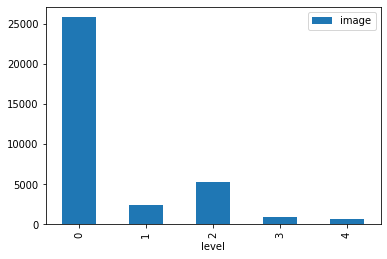

In [ ]:
data = train_df.groupby(by='level').count()
data.plot(kind = 'bar')

# **Fetching the starting 30 images in dataset**

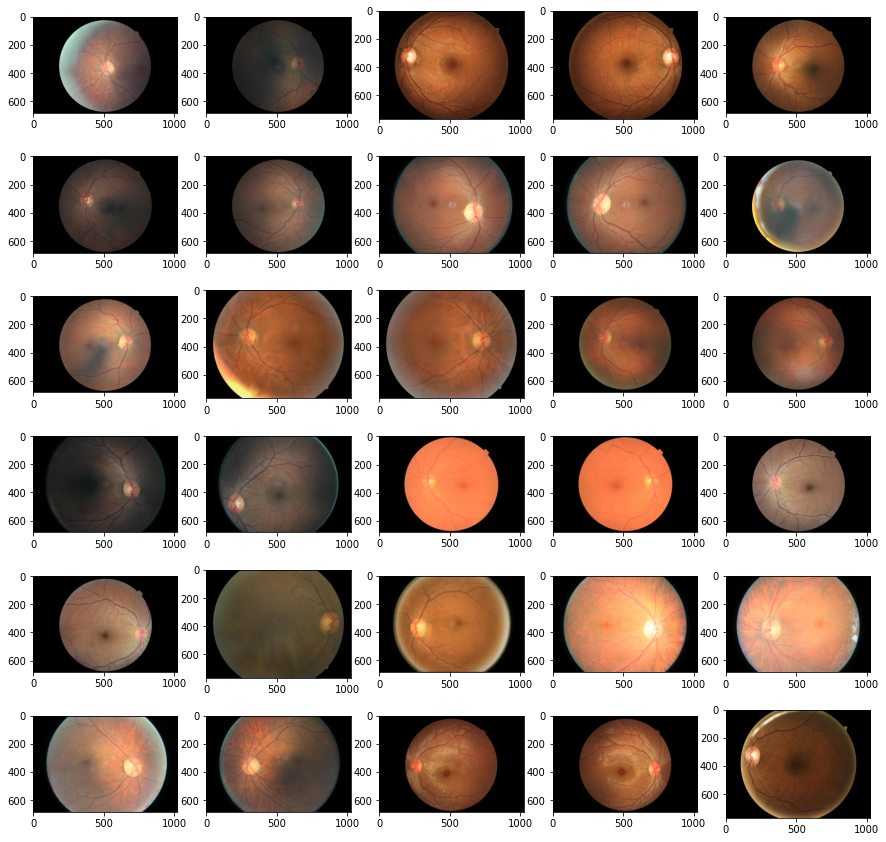

In [ ]:
img_names = train_df[train_df['level']=='0']['image'][:30]

plt.figure(figsize=[15,15])
i = 1
for img_name in img_names:
    img = cv2.imread(img_name)[...,[2, 1, 0]]
    plt.subplot(6, 5, i)
    plt.imshow(img)
    i += 1
plt.show()

# **Data pre-processing applied using Gaussian filter applied :**


*   To remove the noise
*   To enchance the image



In [ ]:
from PIL import Image,  ImageFilter 
import os, fileinput, sys

for entry in os.scandir(path): 
    if entry.path.endswith('.jpeg'):
        img = cv2.imread(entry.path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (320,320))
        img = cv2.addWeighted(img,4,cv2.GaussianBlur(img, (0,0), 320/40) ,-4 ,128)
        # Split our original filename into name and extension
        # (name, extension) = os.path.splitext(entry.path)
        filename = entry.path.rsplit('/',4)[4]
        cv2.imwrite(os.path.join(path, filename), img)
        # cv2.imwrite(filename, img)

**Fectching the images after pre-processing**

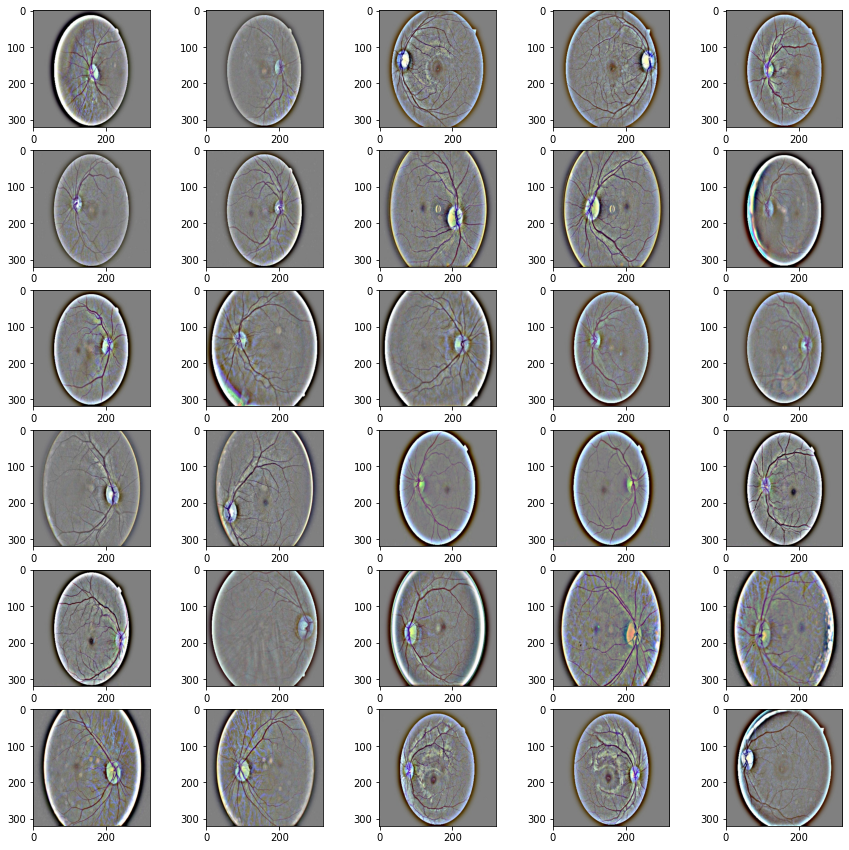

In [ ]:
img_names = train_df[train_df['level']=='0']['image'][:30]

plt.figure(figsize=[15,15])
i = 1
for img_name in img_names:
    img = cv2.imread(img_name)[...,[2, 1, 0]]
    plt.subplot(6, 5, i)
    plt.imshow(img)
    i += 1
plt.show()

# **Listing the different class name of diabetic ratinopathy images**

In [ ]:
level_list = list(train_df.level.unique())
level_list

['0', '1', '2', '4', '3']

**New Folder created for each class**

In [ ]:
for i in level_list:
  dir_path = path = "/content/diabetic_retinopathy_dataset/" + str(i)
  os.makedirs(dir_path)

**Each imaged moved to respective folder location based on class name**

In [ ]:
import shutil
for index, row in train_df.iterrows():
  shutil.move(train_df['image'][index], "/content/diabetic_retinopathy_dataset/"+str(train_df['level'][index]))

**Empty Folder removed**

In [ ]:
shutil.rmtree("/content/resized_train")
shutil.rmtree("/content/resized_train_cropped")

**Cross verifying the availability of data at new location**

In [ ]:
from pathlib import Path

dr_path = "/content/diabetic_retinopathy_dataset"
dirs = os.listdir(dr_path)
ds = len(dirs)
data_dir = Path(dr_path)
image_count = len(list(data_dir.glob('*/*.jpeg')))
print("There are a total of " + str(image_count) +
      " Images and " + str(ds) + " Classes in this dataset.")

There are a total of 35126 Images and 5 Classes in this dataset.


# **Data Augmentation applied to increase the train dataset and data set splitted into 70:30 for training and testing sets.**

**Augmentation technique applied:**


*   Rescaling
*   Flipping
*   Rotation
*   Zoom





In [ ]:
IMAGE_SIZE = 224
BATCH_SIZE = 32

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip = True,
    vertical_flip = True,
    zoom_range=0.5,
    rotation_range = 360, 
    validation_split=0.3)

train_generator = datagen.flow_from_directory(
    dr_path,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    seed=120,
    subset='training')

val_generator = datagen.flow_from_directory(
    dr_path,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    seed=120,
    subset='validation')

Found 24591 images belonging to 5 classes.
Found 10535 images belonging to 5 classes.


**Display the image size and batch of the dataset**

In [ ]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((32, 224, 224, 3), (32, 5))

**Sample images fetched after data augmentation**

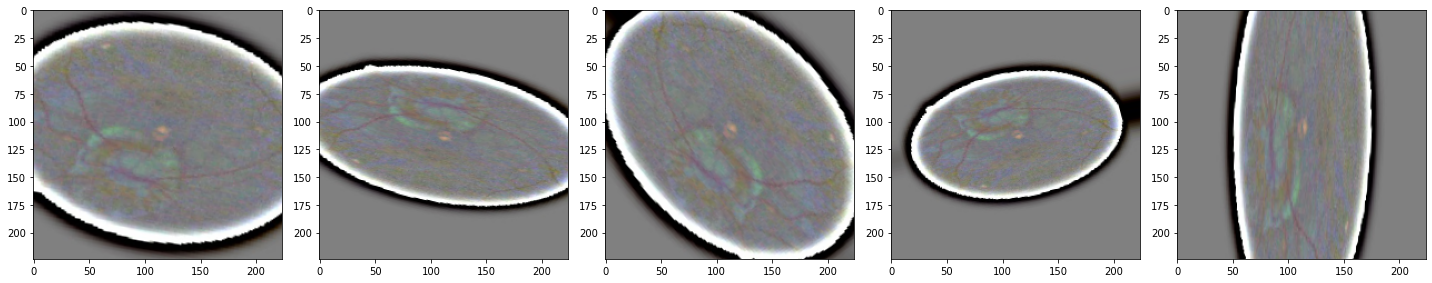

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
    
    
augmented_images = [train_generator[0][0][0] for i in range(5)]
plotImages(augmented_images)

# **Create the base model from either DenseNet121 or VGG19 model pre-trained on the ImageNet dataset**

DensenNet121 model instantiate and pre-loaded with weights trained on ImageNet. By specifying the include_top=False argument, we load a network that doesn't include the classification layers at the top, which is ideal for feature extraction.

In [ ]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

# Create the base model from the pre-trained model of your choice

DenseNet121_model = tf.keras.applications.DenseNet121(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')
VGG19_model = tf.keras.applications.VGG19(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')
MODEL_SELECTION = (DenseNet121_model) #@param ["(DenseNet121_model)", "(VGG19_model)"] {type:"raw", allow-input: true}

base_model = MODEL_SELECTION
print("\n Your selected Model has an input size of {} ".format(IMG_SHAPE))

80142336/80134624 [==============================] - 2s 0us/step

 Your selected Model has an input size of (224, 224, 3) 


# **Feature extraction**

In this step, you will freeze the convolutional base created from the previous step and to use as a feature extractor. Additionally, you add a classifier on top of it and train the top-level classifier.

In [ ]:
base_model.trainable = False

# **Model is build for classification**

In [ ]:
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(5, activation='softmax')
])

**Model is compiled using Adam optimizer**

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
conv2d (Conv2D)              (None, 5, 5, 32)          147488    
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 32)          0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 5)                 165       
Total params: 20,172,037
Trainable params: 147,653
Non-trainable params: 20,024,384
_________________________________________________________________


**Train the model using training dataset and validating**

In [ ]:
history = model.fit(train_generator, 
                    steps_per_epoch=len(train_generator), 
                    epochs=10, 
                    validation_data=val_generator, 
                    validation_steps=len(val_generator))

Epoch 1/10
769/769 [==============================] - 571s 742ms/step - loss: 0.8724 - accuracy: 0.7347 - val_loss: 0.8475 - val_accuracy: 0.7350
Epoch 2/10
769/769 [==============================] - 572s 744ms/step - loss: 0.8479 - accuracy: 0.7346 - val_loss: 0.8417 - val_accuracy: 0.7350
Epoch 3/10
769/769 [==============================] - 568s 739ms/step - loss: 0.8398 - accuracy: 0.7347 - val_loss: 0.8291 - val_accuracy: 0.7350
Epoch 4/10
769/769 [==============================] - 564s 734ms/step - loss: 0.8334 - accuracy: 0.7347 - val_loss: 0.8281 - val_accuracy: 0.7350
Epoch 5/10
769/769 [==============================] - 566s 736ms/step - loss: 0.8342 - accuracy: 0.7347 - val_loss: 0.8281 - val_accuracy: 0.7350
Epoch 6/10
769/769 [==============================] - 574s 747ms/step - loss: 0.8312 - accuracy: 0.7346 - val_loss: 0.8403 - val_accuracy: 0.7350
Epoch 7/10
769/769 [==============================] - 558s 726ms/step - loss: 0.8293 - accuracy: 0.7349 - val_loss: 0.8208 -

# **Learning curves**

Let's take a look at the learning curves of the training and validation accuracy/loss when using the base model as a fixed feature extractor.

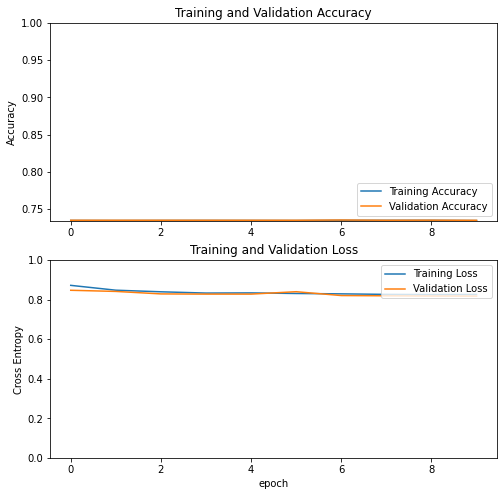

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# **Fine tuning**

In the feature extraction experiment, you were only training a few layers on top of base model. The weights of the pre-trained network were not updated during training.

One way to increase performance even further is to train (or "fine-tune") the weights of the top layers of the pre-trained model alongside the training of the classifier you added. The training process will force the weights to be tuned from generic feature maps to features associated specifically with the dataset.

In [ ]:
base_model.trainable = True

**Complie the model with lower learning rate**

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(1e-5),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
conv2d (Conv2D)              (None, 5, 5, 32)          147488    
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 32)          0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 5)                 165       
Total params: 20,172,037
Trainable params: 20,172,037
Non-trainable params: 0
_________________________________________________________________


**Train the model with large number of Epochs after fine tuning**

In [ ]:
history_fine = model.fit(train_generator, 
                         steps_per_epoch=len(train_generator), 
                         epochs=30, 
                         validation_data=val_generator, 
                         validation_steps=len(val_generator))

Epoch 1/30
769/769 [==============================] - 898s 1s/step - loss: 0.7968 - accuracy: 0.7363 - val_loss: 0.7576 - val_accuracy: 0.7425
Epoch 2/30
769/769 [==============================] - 901s 1s/step - loss: 0.7540 - accuracy: 0.7421 - val_loss: 0.7344 - val_accuracy: 0.7445
Epoch 3/30
769/769 [==============================] - 893s 1s/step - loss: 0.7345 - accuracy: 0.7485 - val_loss: 0.7227 - val_accuracy: 0.7529
Epoch 4/30
769/769 [==============================] - 889s 1s/step - loss: 0.7217 - accuracy: 0.7538 - val_loss: 0.7112 - val_accuracy: 0.7582
Epoch 5/30
769/769 [==============================] - 890s 1s/step - loss: 0.7087 - accuracy: 0.7586 - val_loss: 0.7039 - val_accuracy: 0.7559
Epoch 6/30
769/769 [==============================] - 892s 1s/step - loss: 0.6997 - accuracy: 0.7607 - val_loss: 0.6983 - val_accuracy: 0.7651
Epoch 7/30
769/769 [==============================] - 901s 1s/step - loss: 0.6961 - accuracy: 0.7645 - val_loss: 0.6845 - val_accuracy: 0.7690

# **Learning curves**

Learning curves of the training and validation accuracy/loss when not using the base model as a fixed feature extractor and number of epochs is30.

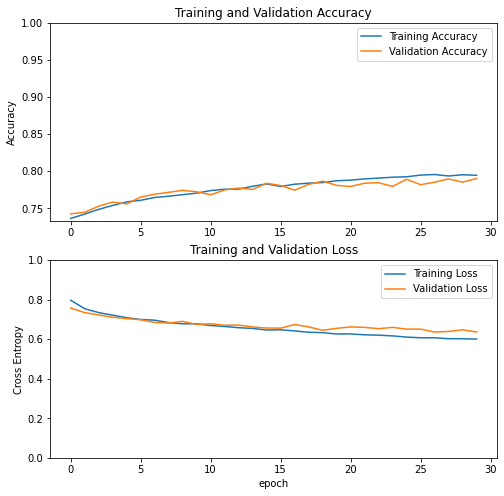

In [ ]:
acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']

loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# **Conclusion**

Fine-tuning a pre-trained model with larger number epochs to increase the accuracy of model.